
 
CSE 270 Sport Analytic 

Student: Anna Martirosyan

Instructor: Habet Madoyan

Date: 14/12/2022

 


#                                                   ABSTRACT 

        
        In the basketball, five players play per team, each assigned to positions:
        Point guard, Shooting guard, Small forward, Power forward, Center. It is a
        common knowledge that each position requires specific phisical profile,
        such as height and weight. For example it is typically for the team's
        shortest player to be the Point guard player or the pivot (or the big man)
        to be the Center player. But during the previous years, those divisions
        are not so evident.
            The main aim of the following project is to analyse and determin how
        the phisical forms of NBA players have changed from 1996 to 2019.





# Literature Review 


        In order to have deep understanding about NBA players' phisical state some 
        scientific papers were analysied. 
    
        One of them was "Body height, body weight, body mass index of elite basketball 
        players in relation to the playing position and their importance for success 
        in the game" written by Milan Andelic and others (see: https://bit.ly/3UJbcjW). 
        The main aim of the paper was to determine the differences in morphological 
        characteristics in professional basketball players in relation  to  the  
        playing  position  in  different  league  competitions  and  to  determine the 
        relevance  of  these characteristics for success in the game. The survey included
        a sample of 773 elite basketball players competing in five different leagues in 
        Europe. The study concluded that centers are significantly taller and heavier 
        than guards and forwards are. In addition to other  components of basketball 
        (technique, tactics, coach strategy), body height, body mass and body mass 
        index play a major role in overall performance in a basketball game in all 
        positions.
    
        Also, besides the abovementioned paper another paper called "Body Height of Elite 
        Basketball Players: Do Taller Basketball Teams Rank Better at the FIBA World Cup?" 
        published by the International Journal of Environmental Research and Public Health
        (https://bit.ly/3PiC7BX) was also investigated. The paper analyzed the differences
        between the basketball players from the teams ranked 1-16 and those ranked below 
        16th place. The body heights of all players from the last three FIBA-WCs were 
        collected and allocated according to the ranking at the FIBA-WC and analyzed by 
        position in team. An independent sample t-test was conducted to analyze the 
        difference in body height of players ranked 1-16 and players who ranked below 16th
        place. The research concluded that the players from the first 16 teams were significantly
        taller at three positions: point guards, shooting guards, and small forwards. Considering 
        that all players at the FIBA-WC went through rigorous selection process to be in their 
        national teams, body height of the higher-ranked players could be used as a reference 
        value.
    
        Comparison of these two scientific articles, their methods and conclusions, played 
        significant role in analzing NBA players' phisical charachteristics.




In [27]:
import warnings
warnings.filterwarnings("ignore")

import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install tabulate

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go


You should consider upgrading via the '/Users/annamartirosyan/PycharmProjects/NBA_height_weight_analysis/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/annamartirosyan/PycharmProjects/NBA_height_weight_analysis/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/annamartirosyan/PycharmProjects/NBA_height_weight_analysis/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/annamartirosyan/PycharmProjects/NBA_height_weight_analysis/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/annamartirosyan/PycharmProjects/NBA_height_weight_analysis/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/annamartirosyan/PycharmProjects/NBA_height_weight_analysis/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/


    For the process of analysing data, making some visualizations and conclusions at first
    we need to collect all the necessary data, filter it, transform and make convinient to 
    use. During this project I will use data of basketball players, such as name, team, age,
    heught, weight, draft year, points per season, seasons played and so on (more details 
    you can see in the dataframe below). Besides that, we also need a dataset with country
    names and coutry codes.
    


In [28]:
all_seasons = pd.read_csv('all_seasons.csv', index_col=0)
ccodes = pd.read_csv("country_code.csv", index_col=0)

all_seasons.head()


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [29]:
all_seasons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11145 entries, 0 to 11144
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11145 non-null  object 
 1   team_abbreviation  11145 non-null  object 
 2   age                11145 non-null  float64
 3   player_height      11145 non-null  float64
 4   player_weight      11145 non-null  float64
 5   college            11145 non-null  object 
 6   country            11145 non-null  object 
 7   draft_year         11145 non-null  object 
 8   draft_round        11145 non-null  object 
 9   draft_number       11145 non-null  object 
 10  gp                 11145 non-null  int64  
 11  pts                11145 non-null  float64
 12  reb                11145 non-null  float64
 13  ast                11145 non-null  float64
 14  net_rating         11145 non-null  float64
 15  oreb_pct           11145 non-null  float64
 16  dreb_pct           111



    We need to change:

        * drafted column type to boolean

        * draft_year column type to integer 

        * season column type to integer 




In [30]:
all_seasons.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000





    From the dataset it is clear that:

        * Since each season consists of 82 games, but the maximum number of 
        games played is 86 => we need to analyse the 4 additional ones. Some
        analyse showed us the players who played more than 82 games, and overall
        there are 14 of them. This is possible because the reason is that those 
        players were traded in the mid of the season. Therefore the records will
        remain unchanged.

        * Next is, that net rating ranges from 300 to -200. Strang! Isn't it? 
        This will also be analysed! The formula to calculate net rating is the 
        following: nr = 100((points)/(poss) - 100((opponents points)/(opponents poss)).
        Still confusing since Bowen could get rating of 300, but outliers are the 
        players who had very light contribution(just one game played) or didn't 
        contribute a team at all => we will get rid of those players (records).




In [31]:
cat = all_seasons.select_dtypes(exclude=[np.number])
cat.describe()

,player_name,team_abbreviation,college,country,draft_year,draft_round,draft_number,season
count,11145,11145,11145,11145,11145,11145,11145,11145
unique,2235,36,316,76,45,8,75,24
top,Vince Carter,TOR,None,USA,Undrafted,1,Undrafted,2017-18
freq,22,390,1684,9410,1942,6513,1959,540



     
     Let's summarize what we have at this point:

            NBA is extremly competitive, because there are 2235 unique players for
            24 unique seasons.

            Now we see overall 36 unique teams, but in 2019 it was 30. So we will 
            analyze additional 6 teams.

            8 draft rounds are strange, beacuse in 2019 there were only 2.
            
                * After some research I found out that before 1989 there were many 
                rounds (6,7,...,21), and after 1989 the system was changed to 2 round.
                
                * The 8th unique value is undrafted variable. The unique draft number 
                column is 75, but since there are 2 rounds and 30 in each of them => again
                strange!  Research found out that this is again the consequence of previous
                draft format.



    NOW, lets change the types of some columns, add additional new columns or change the 
    content of excisting ones, to make it more convinient to work with them further.



In [32]:
ccodes = ccodes[['Country_name', 'code_3digit']]
ccodes = ccodes.rename({'Country_name': 'country'}, axis=1) 
ccodes['country'] = ccodes['country'].replace({'United States of America': 'USA', 'Russian Federation':'Russia',
                                                             'Venezuela (Bolivarian Republic)':'Venezuela', 'Korea (South)':'South Korea',
                                                             'Tanzania, United Republic of':'Tanzania','Macedonia, Republic of':'Macedonia',
                                                             'Congo, (Kinshasa)':'Democratic Republic of the Congo',
                                                             'Congo (Brazzaville)':'Congo','Iran, Islamic Republic of':'Iran',
                                                             'Virgin Islands, US':'US Virgin Islands',
                                                             })

In [33]:
all_seasons['drafted'] = np.where(all_seasons['draft_year'] != 'Undrafted', 1, 0)

In [34]:
all_seasons['draft_year'] = all_seasons['draft_year'].replace(r'Undrafted', np.nan, regex=True)
all_seasons['draft_year'] = pd.to_datetime(all_seasons['draft_year'])

In [35]:
all_seasons['season'] = pd.to_datetime(all_seasons['season'].str[:4])

In [36]:
all_seasons['country'] = all_seasons['country'].replace({'Great Britain':'United Kingdom','England':'United Kingdom','Scotland':'United Kingdom',
                                       'Bosnia & Herzegovina':'Bosnia and Herzegovina','Bosnia':'Bosnia and Herzegovina',
                                       'Cabo Verde':'Cape Verde','St. Vincent & Grenadines':'Saint Vincent and Grenadines'})

In [37]:
main_variables = all_seasons.groupby('player_name', as_index=False).agg({'player_height': 'mean', 'player_weight':'mean'})

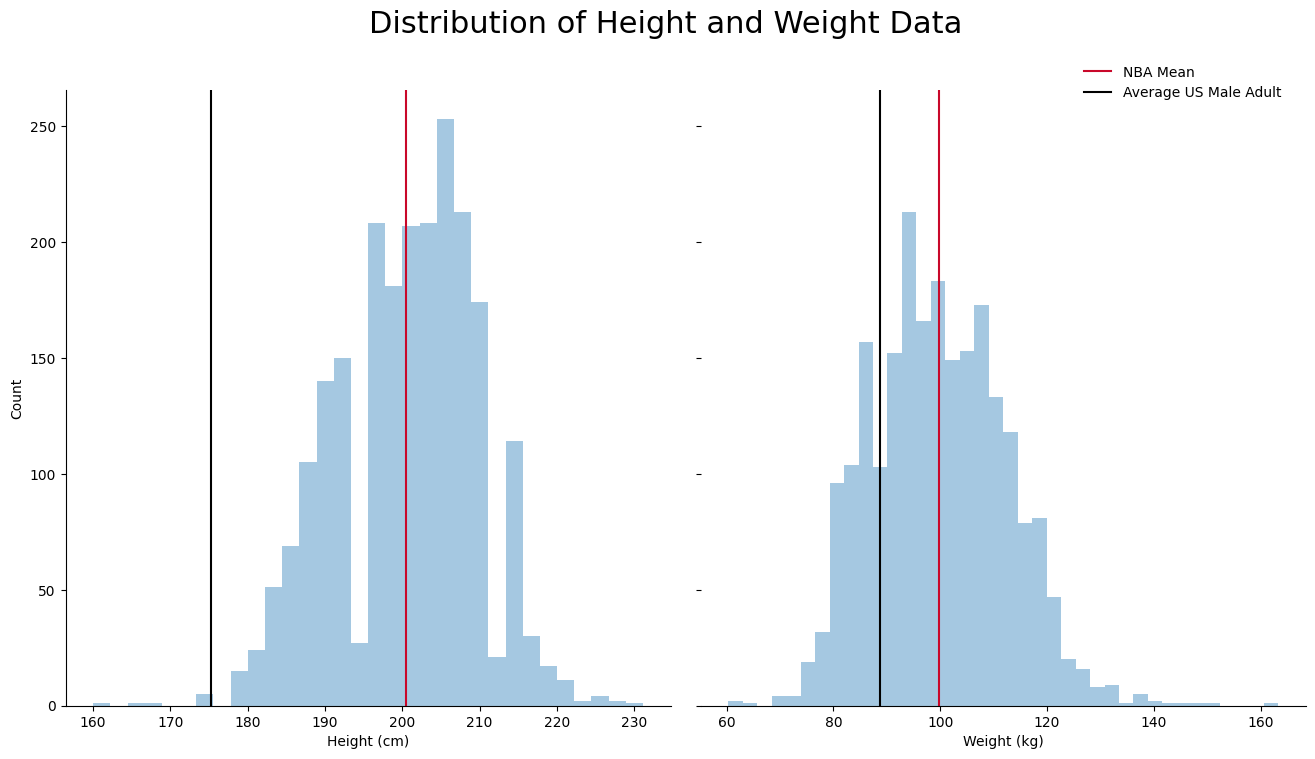

In [38]:
# sources:
# https://en.wikipedia.org/wiki/Average_human_height_by_country
# https://en.wikipedia.org/wiki/Human_body_weight

figure, ax = plt.subplots(1,2,figsize=(16, 8),sharey=True)
plt.subplots_adjust(wspace=0.05)

sns.distplot(main_variables ['player_height'], ax=ax[0], label='_nolegend_', kde=False)
sns.distplot(main_variables ['player_weight'], ax=ax[1], label='_nolegend_', kde=False)
ax[0].axvline(main_variables ['player_height'].mean(), color='#c9082a', label='NBA Mean')
ax[1].axvline(main_variables ['player_weight'].mean(), color='#c9082a', label='NBA Mean')

# Add lines for average adults to compare
ax[0].axvline(175.3, color='#000000', label='Average US Male Adult')
ax[1].axvline(88.8, color='#000000', label='Average US Male Adult')

ax[0].yaxis.set_label_text('Count')
ax[0].xaxis.set_label_text('Height (cm)')
ax[1].xaxis.set_label_text('Weight (kg)')
plt.suptitle('Distribution of Height and Weight Data', fontsize=22)
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 1.06), frameon=False)
sns.despine(ax=ax[1], left=True)
sns.despine(ax=ax[0])

plt.show()



    From the above visualizations, with the red line we can see the mean of height 
    and weight of NBA male players. And it is clear that there is a deviation 
    compared with height and weight of average US man. Also both height and weight
    are distributted normally.
    
   



    Now let's find the correlation between height and weight with a scatterplot.
    
   

In [39]:
figure = go.Figure(data=go.Scatter(x=main_variables['player_weight'],
                                y=main_variables['player_height'],
                                mode='markers',
                                text=main_variables['player_name'],
                                marker=dict(color='#301934')
                                ))

figure.update_layout(
    title='NBA Player Height and Weight',
    xaxis_title='Weight (kg)',
    yaxis_title='Height (cm)',
    plot_bgcolor='rgba(0,0,0,0)'
)
figure.show()



    Now lets plot a correlation line to see more clearly, how these 2 attributes are 
    correlated.



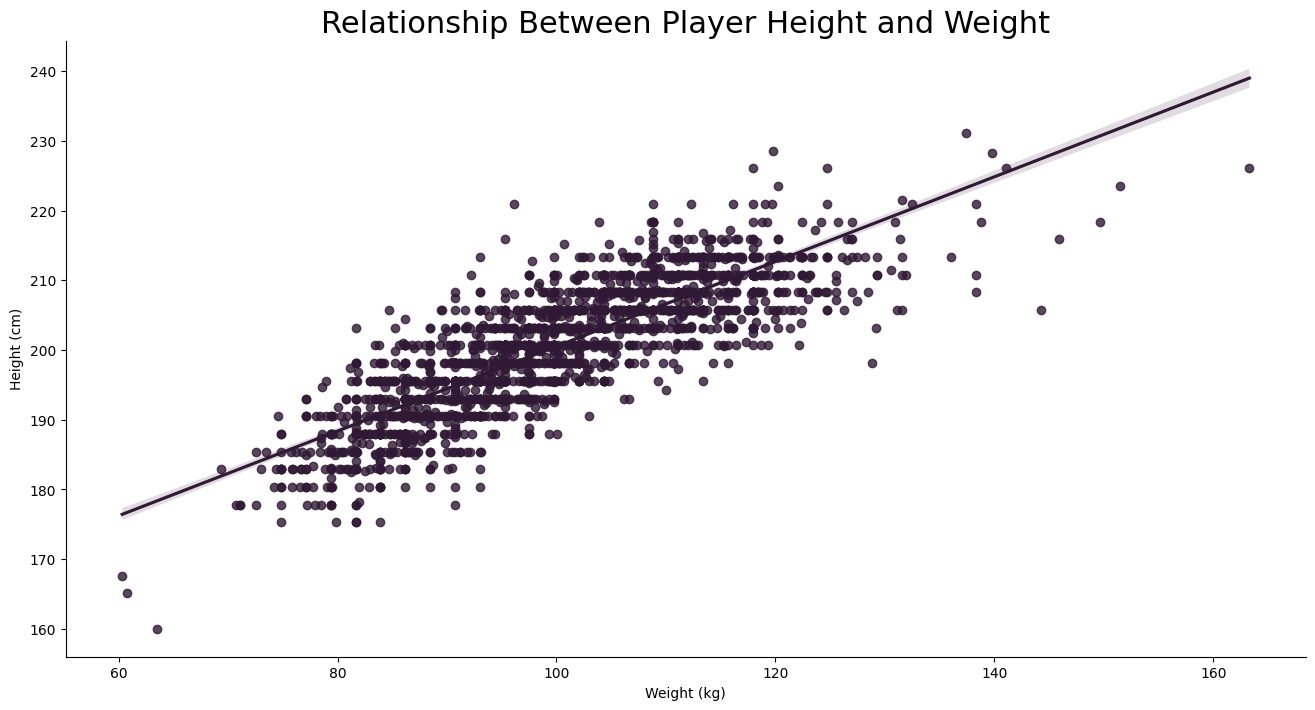

In [40]:
plt.figure(figsize=(16, 8))

sns.regplot(x='player_weight', y='player_height', data=main_variables, color='#301934')

plt.title('Relationship Between Player Height and Weight', fontsize=22)
plt.ylabel('Height (cm)')
plt.xlabel('Weight (kg)')
sns.despine()

plt.show()


    
    From the above graph we can conclude that height and weight are nearly linearly
    positively correlated. Which means that increase in height will lead to incrase 
    in weight and vice versa.
    




    This is an early indicator of the changing body types of NBA players.  Now let's see 
    the correlation results per season, so it will be more visible to understand whether
    it is increasing or decreasing. As as wee can see from the below graph phisical 
    attributes(height and weight) and body types are changing over time. And after 2015
    it seems that it tends to decrease.
    


In [41]:
corr_over_seasons = all_seasons.groupby('season')[['player_weight','player_height']].corr().unstack().iloc[:,1]

figure = go.Figure()
figure.add_trace(go.Scatter(x=corr_over_seasons.index, 
                         y=corr_over_seasons.values,
                         mode='lines',
                         name='lines',
                         line=dict(color='#000000')
                        ))

figure.update_layout(
    title='NBA Player Height and Weight Correlation Each Season',
    xaxis_title='Season',
    yaxis_title='Correlation',
    plot_bgcolor='rgba(0,0,0,0)'
)

figure.show()

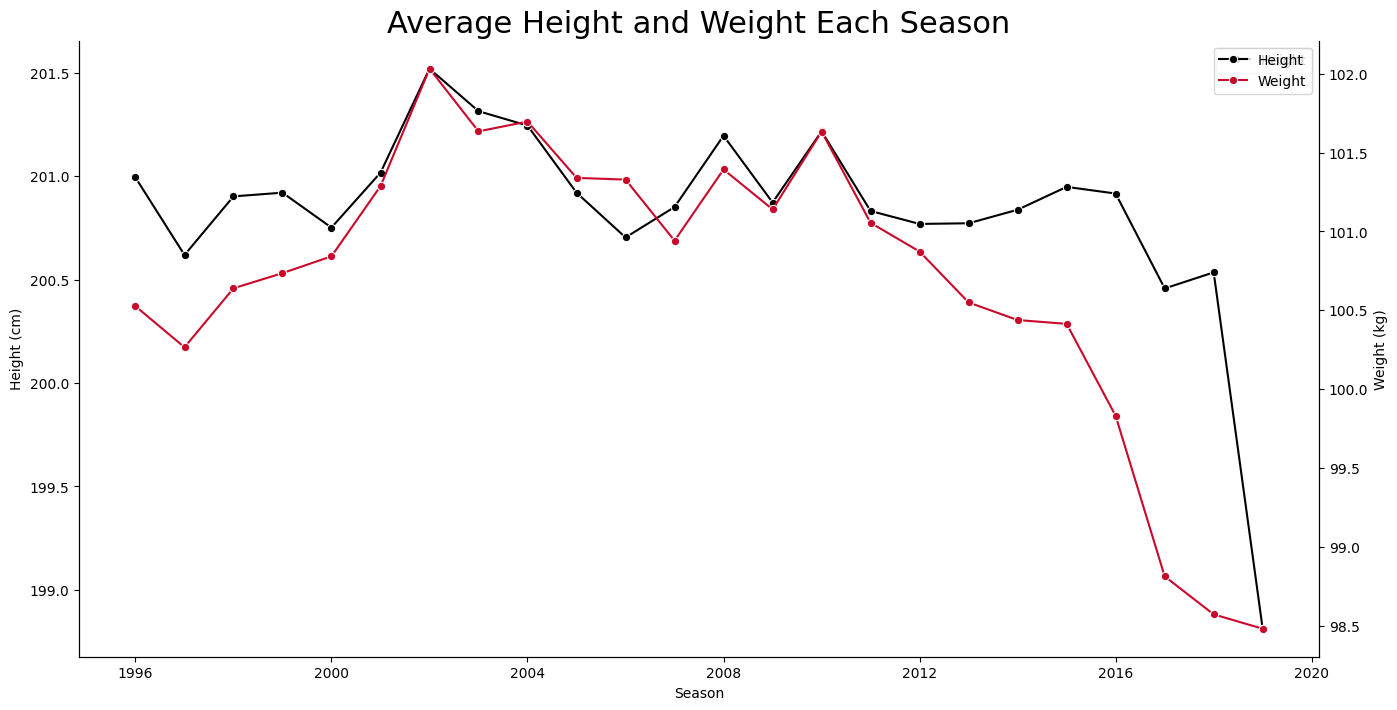

In [42]:
figure, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()

sns.lineplot(x=all_seasons['season'], y='player_height', data=all_seasons, marker="o", ax=ax, ci=None, label='Height', color='#000000')
sns.lineplot(x=all_seasons['season'], y='player_weight', data=all_seasons, marker="o", ax=ax2, ci=None, label='Weight', color='#c9082a')

plt.title('Average Height and Weight Each Season', fontsize=22)
ax.xaxis.set_label_text('Season')
ax.yaxis.set_label_text('Height (cm)')
ax2.yaxis.set_label_text('Weight (kg)')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()



    From the above graph we can see that after 2015-2016 season both the height and 
    weight average is decreasing and in 2019 it reaches its lowest stage.
    
   

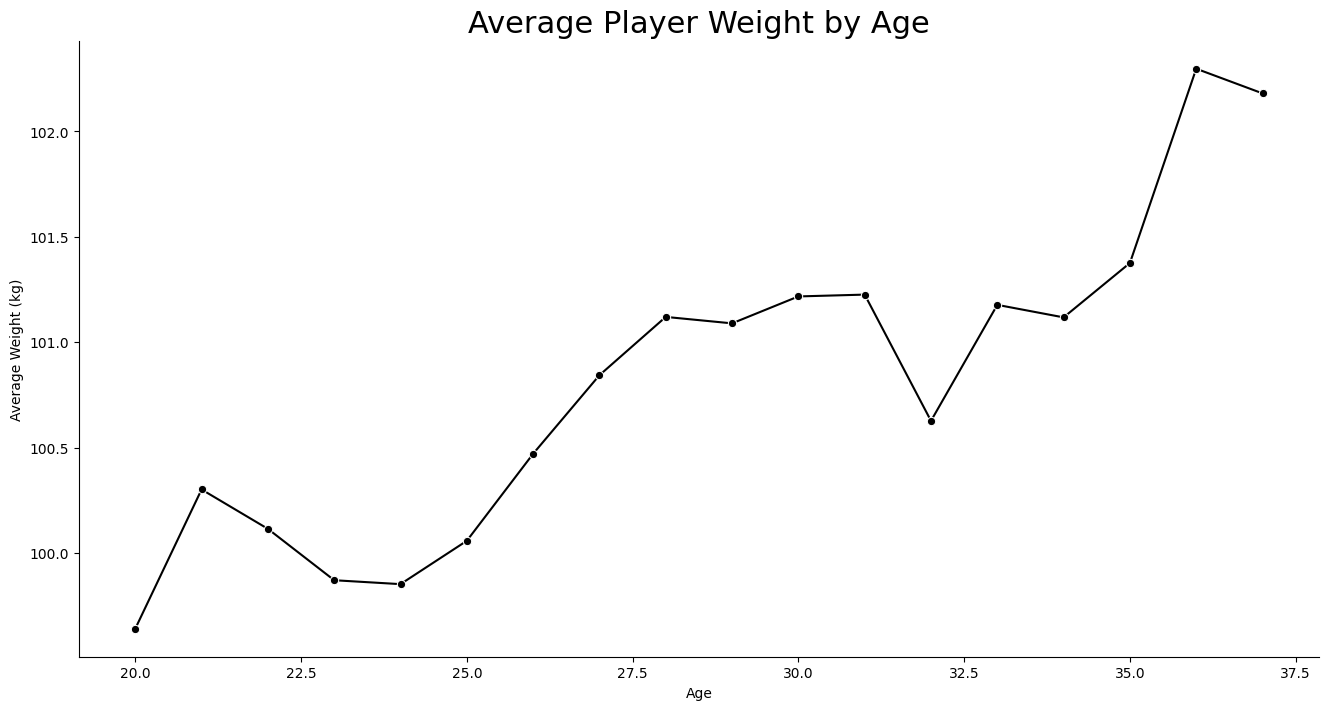

In [43]:

plt.figure(figsize=(16, 8))

w_by_age = all_seasons.groupby(['age'])['player_weight'].agg(['mean', 'count'])
w_by_age['outliers'] = np.where(w_by_age['count']<=100, 1, 0)
w_by_age = w_by_age.loc[w_by_age['outliers']==0]

sns.lineplot(x=w_by_age.index, y='mean', data=w_by_age, marker='o', color='#000000')

plt.title('Average Player Weight by Age', fontsize=22)
plt.ylabel('Average Weight (kg)')
plt.xlabel('Age')
sns.despine()

plt.show()



    The above graph shows the average player weight by age. And as we can see by the 
    increase of age the weight also increases. So we can conclude that younger NBA 
    players weight less than older ones.
    



In [44]:
relevant_fields = all_seasons[['player_name', 'player_height', 'player_weight', 'country', 'season']]
player_first_season = relevant_fields.loc[relevant_fields.groupby(['player_name']).season.idxmin()]

geo = player_first_season.groupby('country', as_index=False).agg({'player_height': 'mean', 
                                                                  'player_weight':'mean', 
                                                                  'player_name':'count'}).rename({
    'player_name': 'count'}, axis=1) 

geo = geo[geo['count'] >= 3]

geo = pd.merge(geo, ccodes, how='inner', on='country')

In [45]:
map_h = go.Choropleth(
    locations = geo['code_3digit'],
    z = geo['player_height'],
    text = geo['country'],
    colorscale = [[0, 'rgb(230, 230, 250)'], [1, 'rgb(112, 41, 99)']],
    marker_line_color='black',
    marker_line_width=0.3,
    colorbar_title = 'Height of players in cm'
)

map_w = go.Choropleth(
    locations = geo['code_3digit'],
    z = geo['player_weight'],
    text = geo['country'],
    colorscale = [[0, 'rgb(255, 222, 173)'], [1, 'rgb(255, 95, 21)']],
    marker_line_color='black',
    marker_line_width=0.3,
    colorbar_title = 'Weight of players in kg',
    visible=False
)

combined = [map_h, map_w]

umen = list([
    dict(type="buttons",
         y=0.7,
         buttons=list([   
            dict(label = 'Height Map',
                 method = 'update',
                 args = [{'visible': [True, False]},
                         {'title': 'Average NBA Player Height by Country'}]),

            dict(label = 'Weight Map',
                 method = 'update',
                 args = [{'visible': [False, True]},
                         {'title': 'Average NBA Player Weight by Country'}])
        ]),
    )
])

lay = dict(updatemenus=umen,
             title_text='Average NBA Player Height by Country',
             geo=dict(
                showframe=False,
                showcoastlines=False,
                projection_type='equirectangular'),
             margin=dict(l=0, r=0, b=0),
             height=500
             )

figure = dict(data=combined, layout=lay)

plotly.offline.iplot(figure)



    The above visualisation showcases average player height and weight (minimum 3 unique
    players) based on the country they were born in (or have citizenship of).
    
   



    Now lets find the correlation of player height and weight with average assists and
    rebounds, points and other statistics. And as we can see from below graph height 
    and weight are affecting average assist and rebound statistics.
    


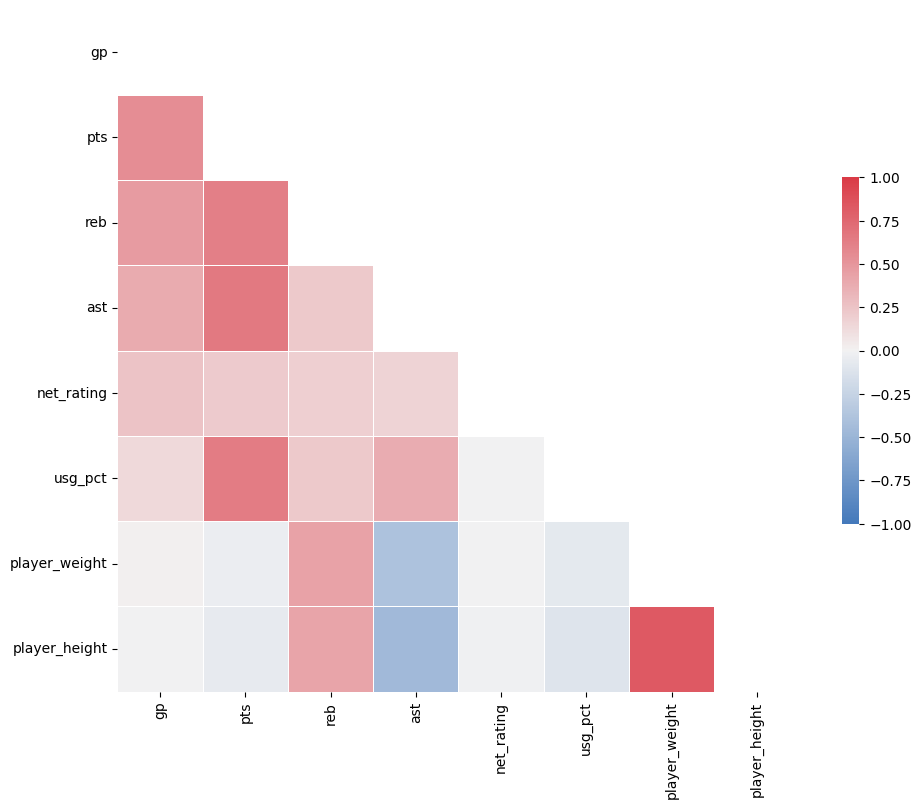

In [46]:
df_corr = all_seasons[all_seasons['season'] != '2019-01-01']
df_corr = all_seasons[['gp','pts','reb','ast','net_rating','usg_pct','player_weight', 'player_height']]

corr = df_corr.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


    
    In the above correlation heatmap, if the 2 variables have positive correlation
    (near 1) they are colored red.  
    If the correlation is negative the color is blue.
    
   

# CONCLUSION

    
    To conclude, the height and weight as well as other phisical attributes highly 
    affect NBA players' performance and are highly correlated with  average assists, 
    rebounds, blocks and other statistics. The body structure of NBA players have 
    changed through years and it seems that it tends to decrease through time. Also
    age is an important factor which affects player's weight. And finaly from the 
    research we can conclude that the players with highest height and weight were 
    born in China or have citizenship of China.
    
  